<a href="https://colab.research.google.com/github/GarzonDiegoINL/Characterization/blob/main/Tauc_Plot_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tauc Plot**

To calculate the band gap of your thin film from the data of transmittance with the IS.

Here you can find more about the theory here: [Determine band gap of semiconductors](https://pubs.acs.org/doi/10.1021/acs.jpclett.8b02892), [Wikipedia page](https://en.wikipedia.org/wiki/Tauc_plot), [Revisiting the optical bandgap of semiconductors and the proposal of a unified methodology to its determination](https://www.nature.com/articles/s41598-019-47670-y)

In this case, the absorption coefficient is calculated from the transmittance data and the thickness, following the formula:

\begin{align}
  \alpha_{comp} = +\frac{1}{t} \cdot \ \ln\left(\frac{(1-R)^2}{T} + \sqrt{\frac{(1-R)^4}{4T^2}+R^2}\right)
\end{align}


Where $\alpha$ is the absorption coefficient, $t$ is the thickness of the film in cm. $T$ and $R$ is the transmittance and reflectance fraction, respectively. This data is obtained directly from the csv file.

In addition, in order to calculate the energy in eV ($h\nu$), the following formula is used based on the wavelenght ($\lambda$) measured:

\begin{align}
 h\nu = \frac{hc}{\lambda} \cdot \frac{1}{e}
\end{align}

Where $h$ is Plank's constant, $c$ is the speed of light, and $e$ is the elemental charge.

Following the tauc method, the following mathematical relation will be used:

\begin{align}
 (h\nu \cdot \alpha)^{1/\gamma} = B(h\nu - E_g)
\end{align}

Where $\gamma$ denotes the nature of the transitions, in this code we  only considered $\gamma = 2$ and $\gamma = 1/2$ for indirect and direct allowed transitions, respectively. $E_g$ corresponds to the band gap and it is found by extrapolating to the abscissa the linear region in the plot.

# **Instruction to run the code**

In order to run the code you have to continue with the following steps:

1.   Create and excel file called "thickness.xlsx" with two columns, the first column should be called Ref and should correspond to the name of the csv files (with out the .csv), and the second colum should be called thickness and should correspond to the thickness of your thin film in cm. For example:

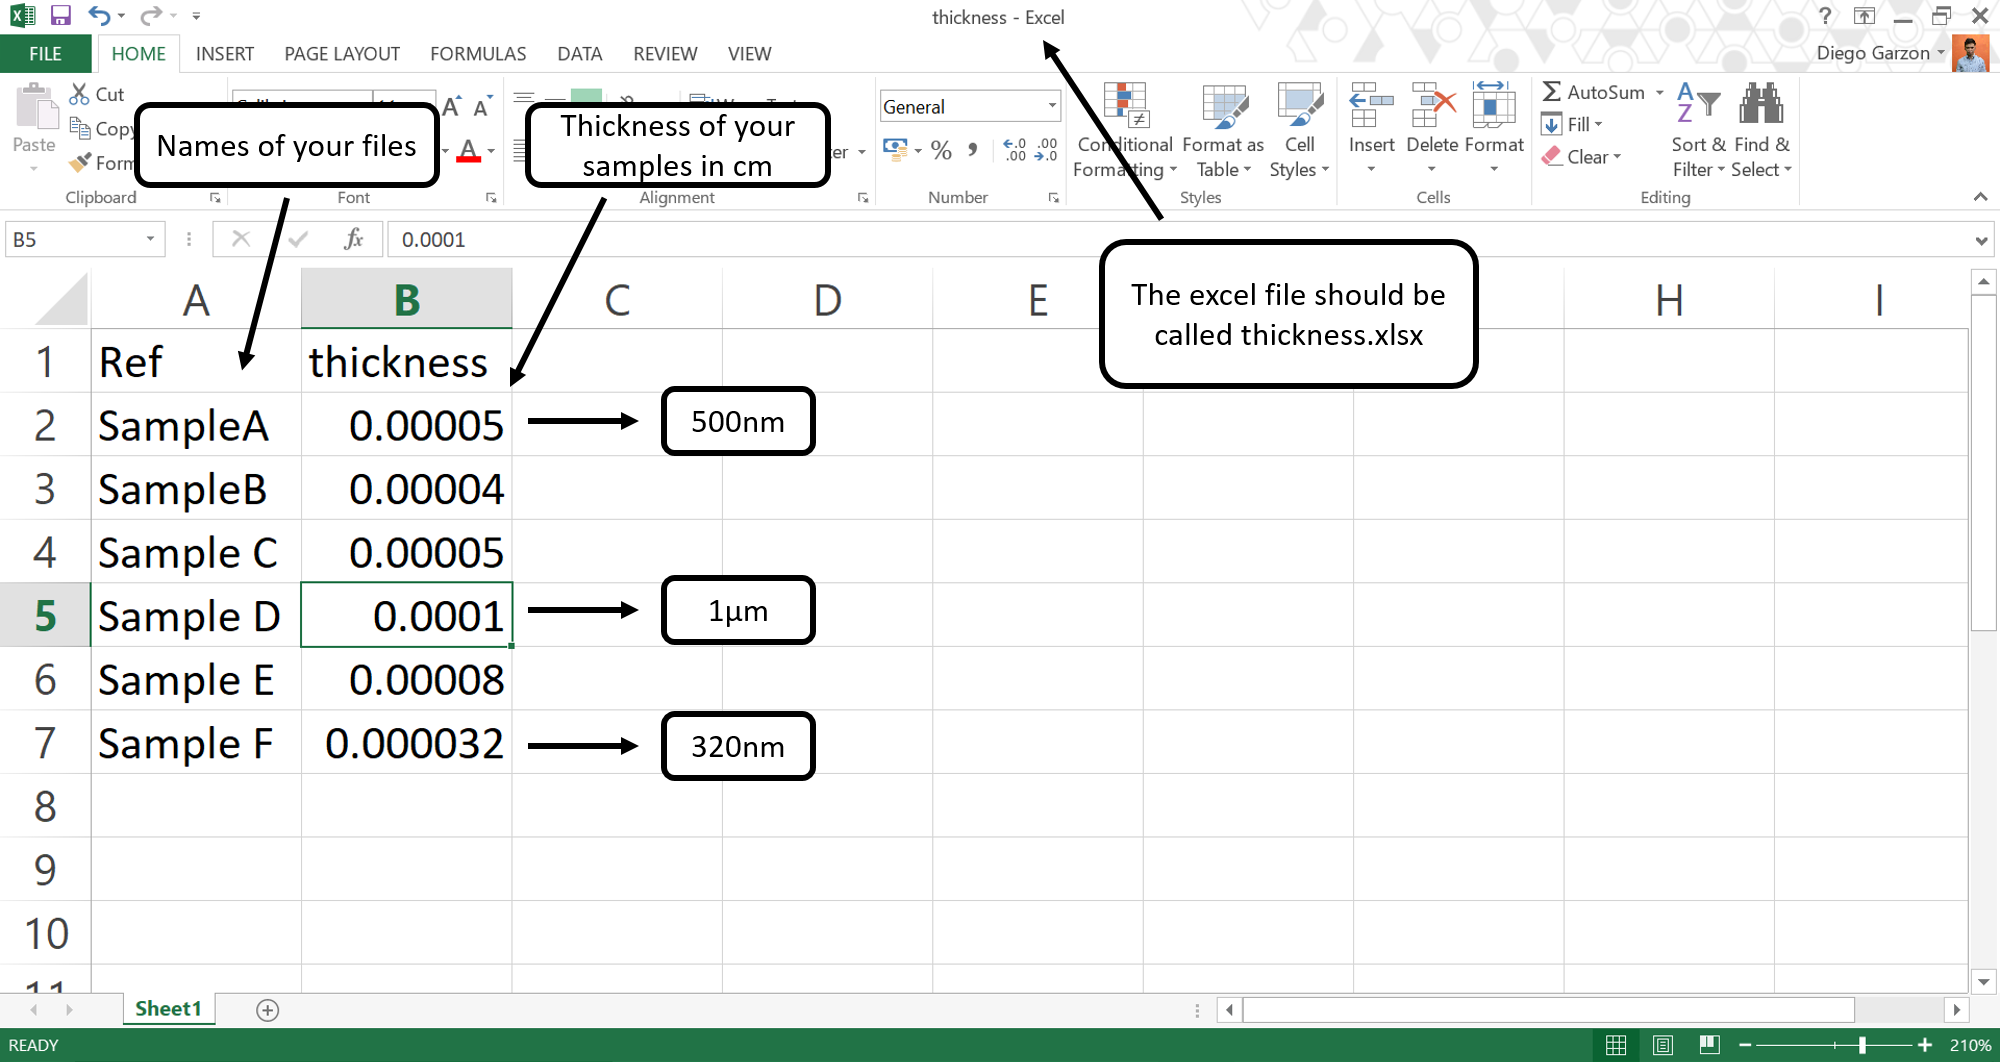

2.   Upload the thickness.xlsx file together with the csv files that you got from your transmmitance measurement. In order to upload, click the folder button in the left of the screen and click the upload button (first button), and select the respective files files. It is important to have the transmittance file with the name **"T-Sample name"** and the reflectance file with the name **"R-Sample name"**. For example:

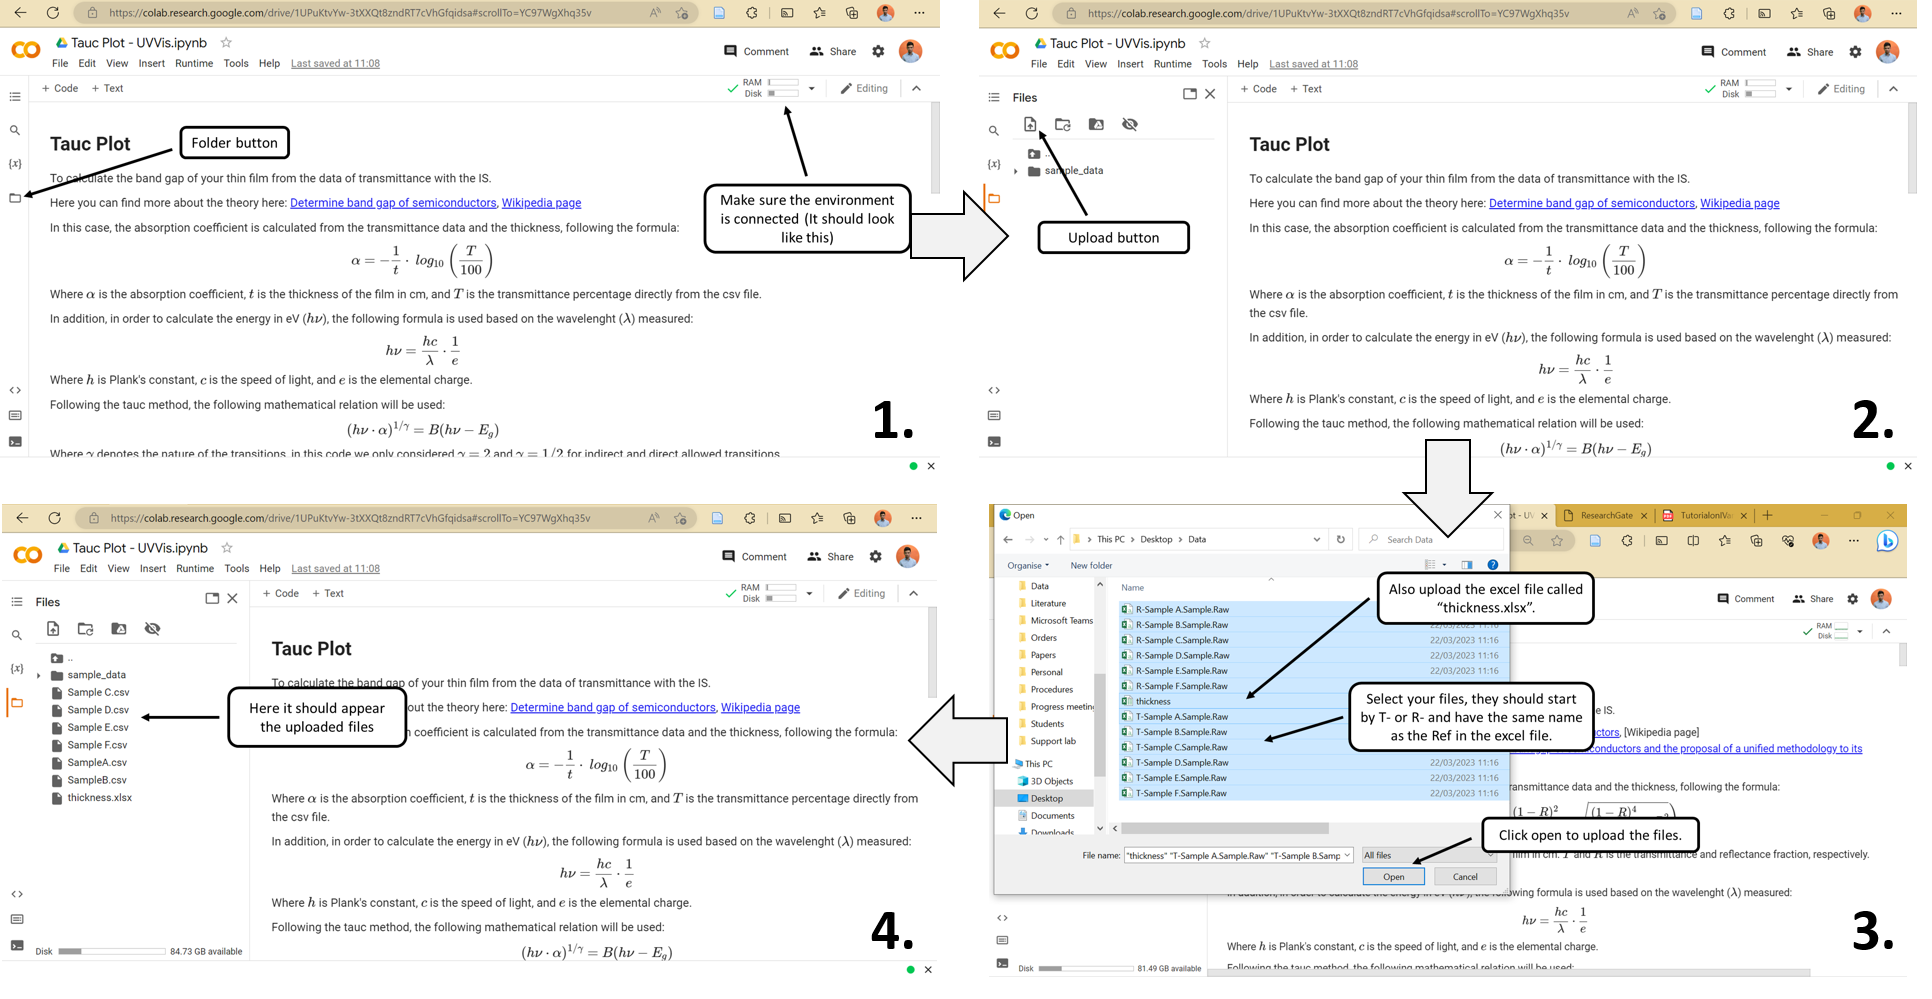

3. Run the following cells that will produce the tauc plots. To run the cells, select them and click Ctrl+Enter or the play button in the left of the cell. You can also click Ctrl+F9 to run all.

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob as gl

In [7]:
sample

{'251029A1': 0.0005,
 '251029A2': 0.0005,
 '251029A3': 0.0005,
 '251029B4': 0.0005,
 '251029B5': 0.0005,
 '251029B6': 0.0005,
 '251029C7': 0.0005,
 '251029C8': 0.0005,
 '251029C9': 0.0005}

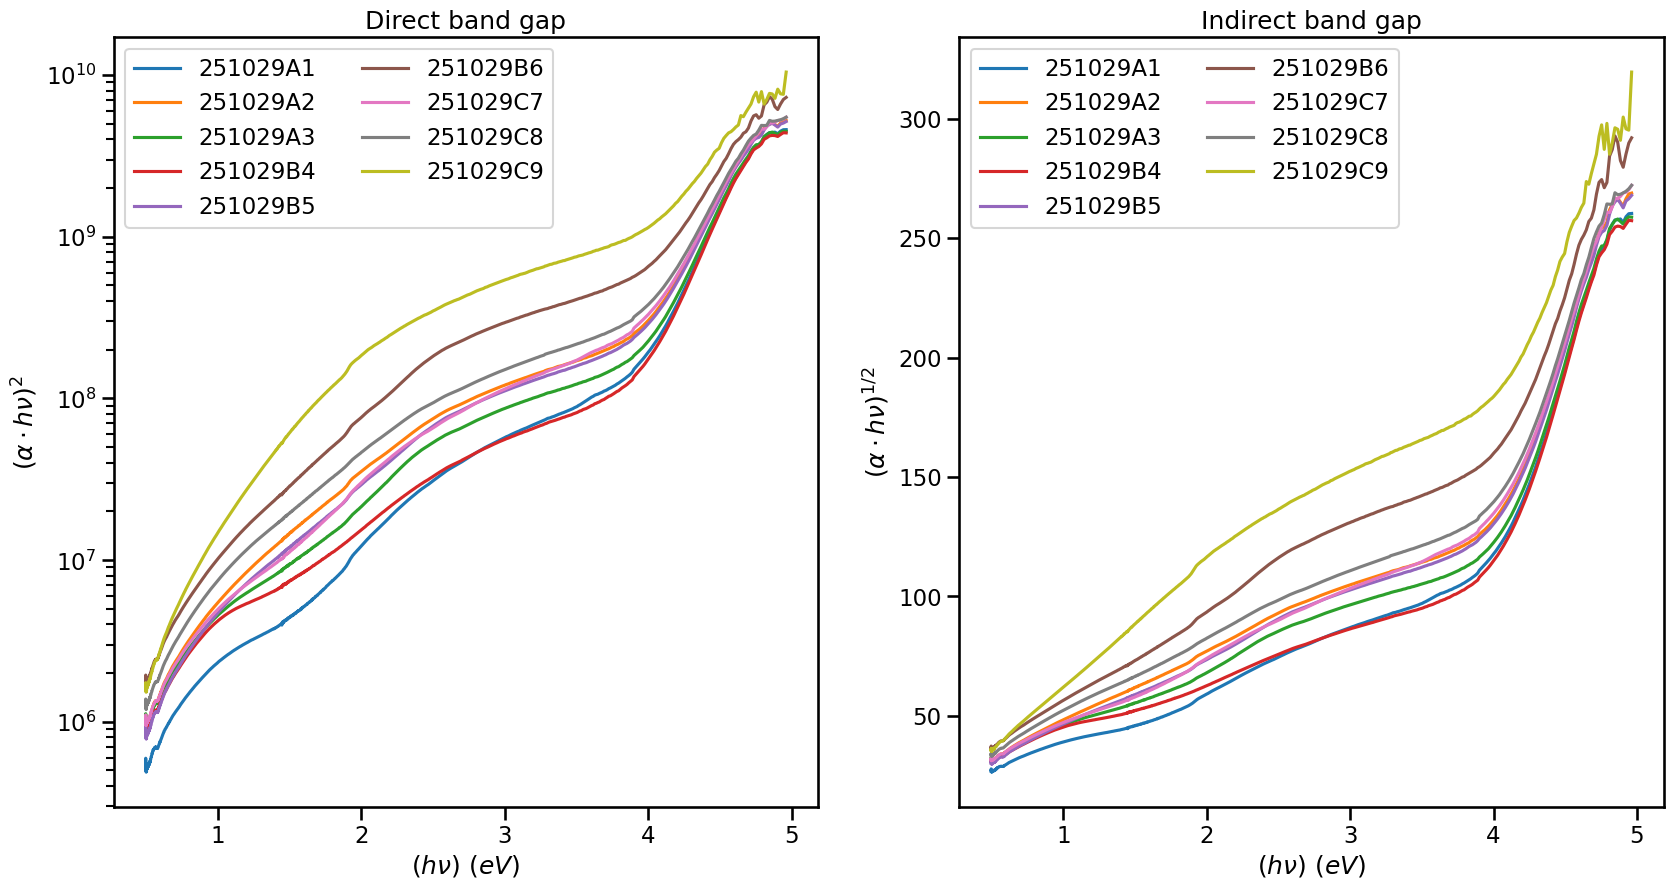

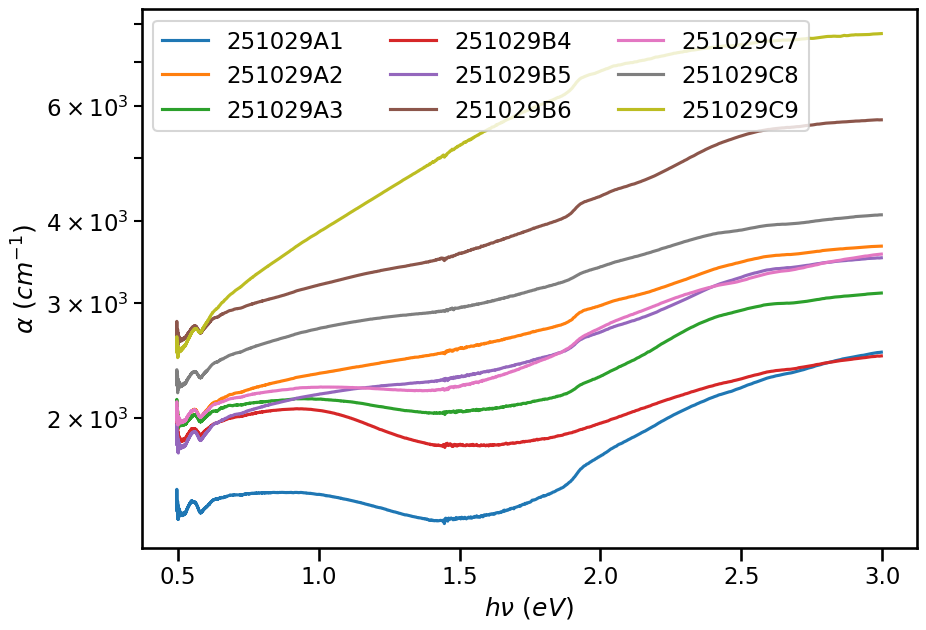

In [22]:
#Read the excel file to obtain the thickness
sample = pd.read_excel('/content/thickness.xlsx')
sample['Ref'] = sample['Ref'].astype(str)
sample = sample.set_index('Ref')
sample = sample.to_dict()['Thickness']

#Read the csv files
files = gl.glob('*.csv')
#files = [x for x in files if 'T-' in x]

#DataFrames to save the results (optional, can be generated from 'res' if needed)
results1 = pd.DataFrame()
results2 = pd.DataFrame()
results3 = pd.DataFrame()

#Dictionary to save the results for each sample
res = {}

import seaborn as sns
sns.set_context('talk')

#Create the Tauc plots for all the samples
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig1, ax3 = plt.subplots(1, 1, figsize=(10, 7))


#For each row in the excel file, it will look for the csv file with that name and calculate the respective alpha, and the quantities for the tauc plots
for sam in sample:
  label = sam
  labels_files = [x for x in files if sam in x]
  T_label = [x for x in labels_files if 'T-' in x][0]
  R_label = [x for x in labels_files if 'R-' in x][0]
  label_plot = sam
  thickness = sample[label]
  if thickness != 0:
    data_ = pd.read_csv(T_label)
    data_ = data_.join(pd.read_csv(R_label)[' %R'])
    data_[' %R_'] = data_[' %R']/100
    data_[' %T_'] = data_[' %T']/100
    nm = data_['nm']
    rt = (1 - data_[' %R_'])**2/(data_[' %T_']) + np.sqrt( (1 - data_[' %R_'])**4/(4*data_[' %T_']**2) +  data_[' %R_']**2  )

    x = (6.626*10**-34 * 3*10**8)/ (nm * 10**-9) / (1.60217*10**(-19))
    data_y = np.where(rt <= 0, 1E-10, rt)

    y = np.log(data_y)/thickness
    y_DA = (y*x)**(2)
    y_IA = (y*x)**(1/2)

    # Store all relevant data for the current sample in the 'res' dictionary
    res[label_plot] = {
        'hv': x,
        'alpha': y, # Store the calculated alpha values
        'DA': np.nan_to_num(y_DA),
        'IA': np.nan_to_num(y_IA),
        'nm': data_['nm'],
        '%R': data_[' %R'],
        '%T': data_[' %T']
    }

    # Plot the data
    ax1.plot(x,y_DA, label=label_plot)
    ax2.plot(x,y_IA, label=label_plot)

    #absorbance plot
    small_range_y = y[x<3]
    small_range_x = x[x<3]
    ax3.plot(small_range_x, small_range_y, label=label_plot)



# Fix the graph of direct band gap
ax1.legend(ncols=2)
ax1.set_ylabel(r'$(\alpha \cdot h \nu)^2$')
ax1.set_xlabel(r'$(h \nu) \ (eV)$')
ax1.set_title('Direct band gap')
ax1.set_yscale("log")

# Fix the graph of indirect band gap
ax2.legend(ncols=2)
ax2.set_ylabel(r'$(\alpha \cdot h \nu)^{1/2}$')
ax2.set_xlabel(r'$ ( h \nu) \ (eV)$')
ax2.set_title('Indirect band gap')

# Fix the graph of indirect band gap
ax3.legend(ncols=3)
ax3.set_ylabel(r'$\alpha \ (cm^{-1})$')
ax3.set_xlabel(r'$ h \nu \ (eV)$')
ax3.set_yscale("log")
#ax3.set_xlim([0,3])

# Save the values of the tauc plot in excel files
with pd.ExcelWriter(f"results_tauc_plot.xlsx") as writer:
  for label_plot, data in res.items():
      df_export = pd.DataFrame(data)
      df_export.to_excel(writer, index=False, sheet_name=label_plot )


plt.show()

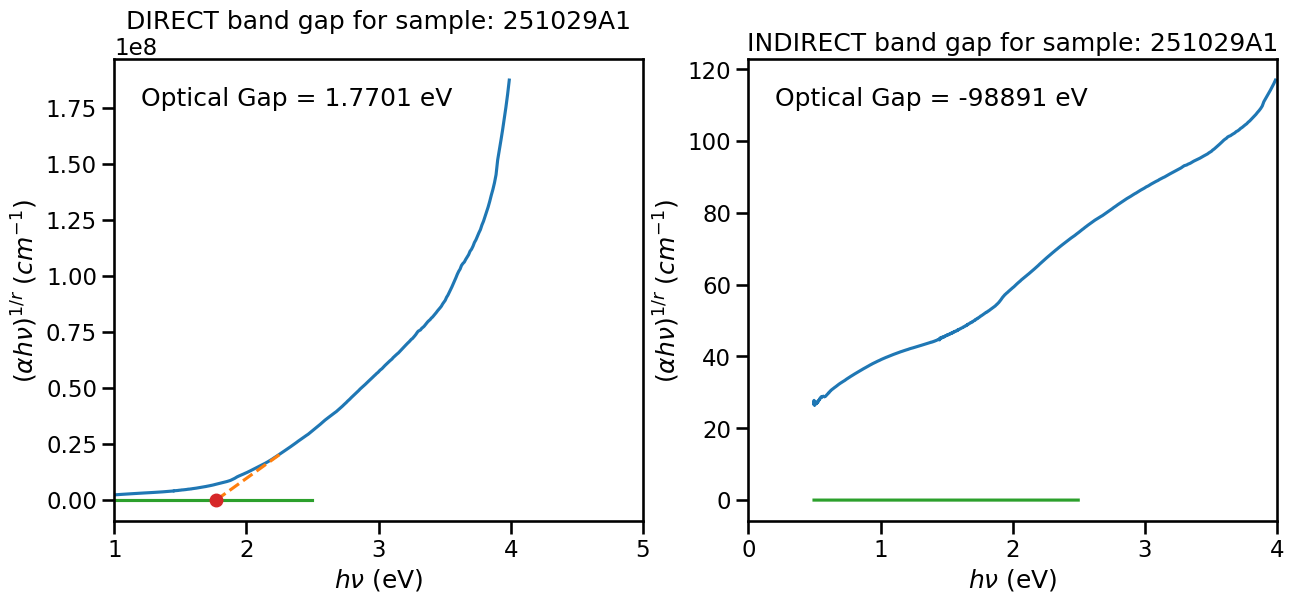

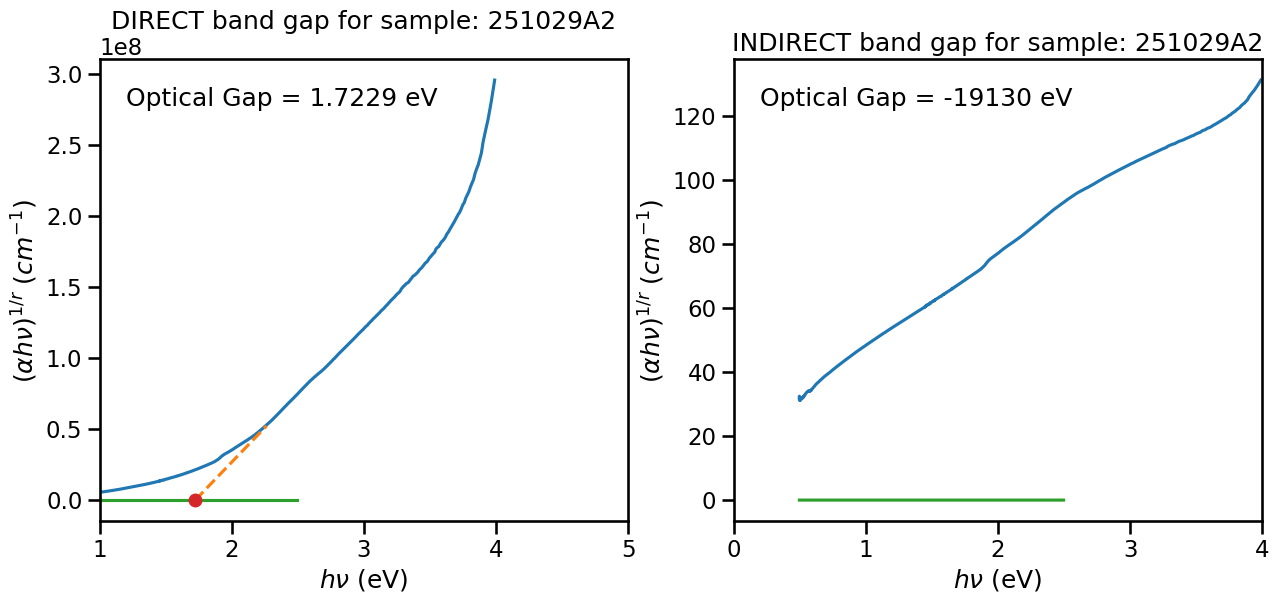

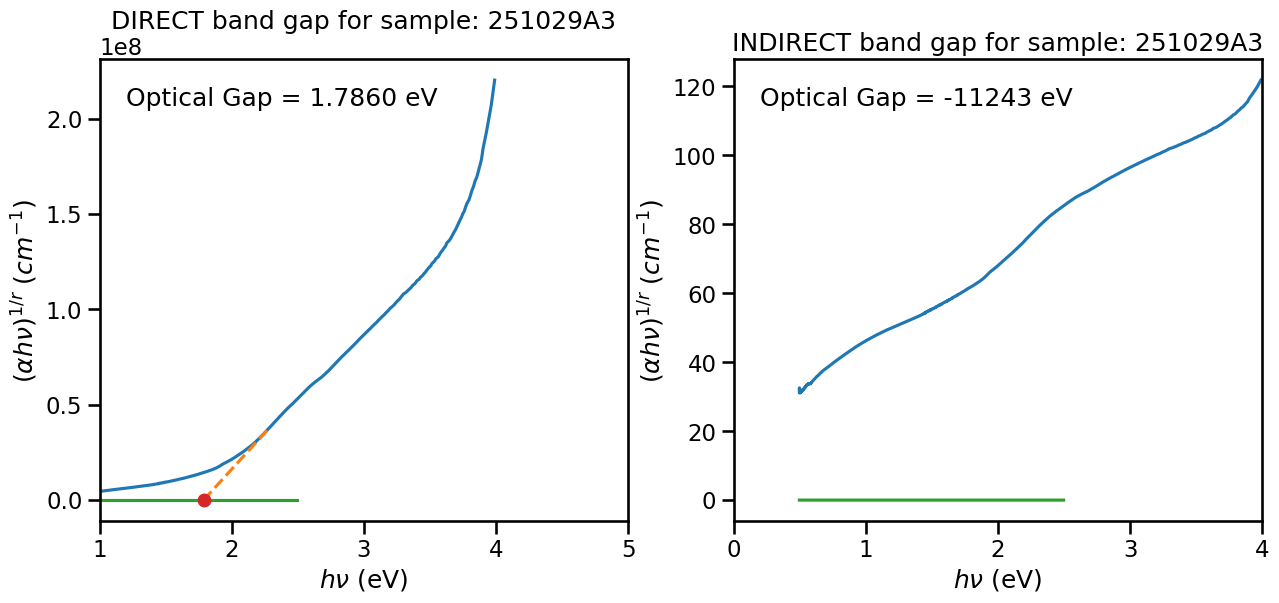

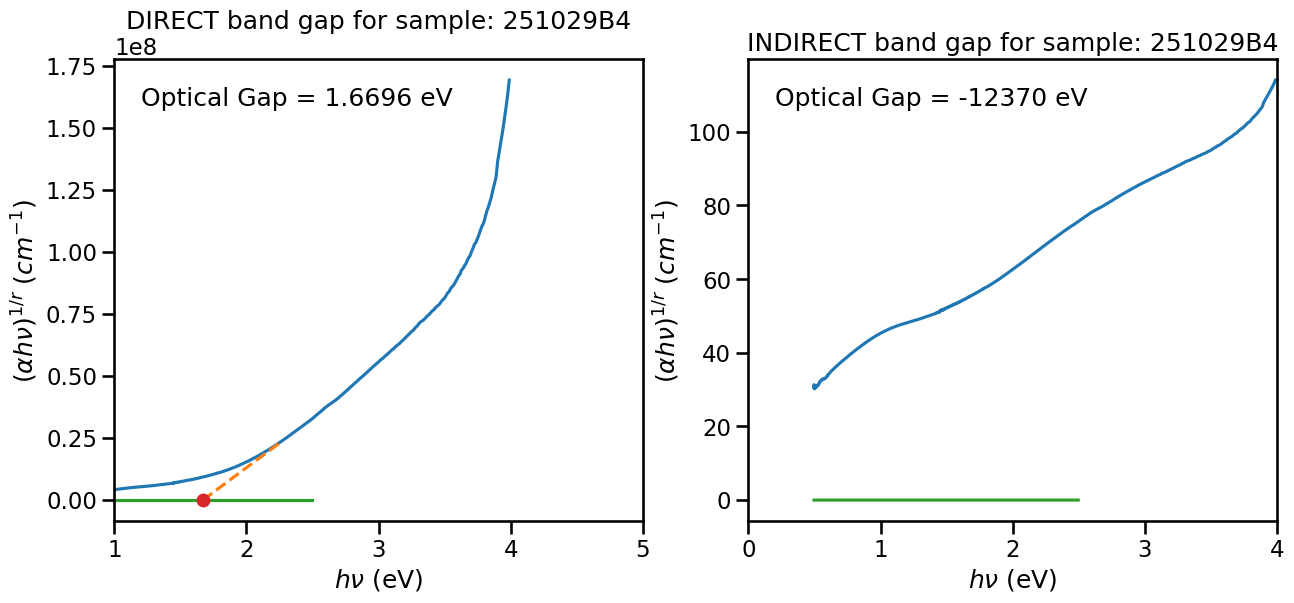

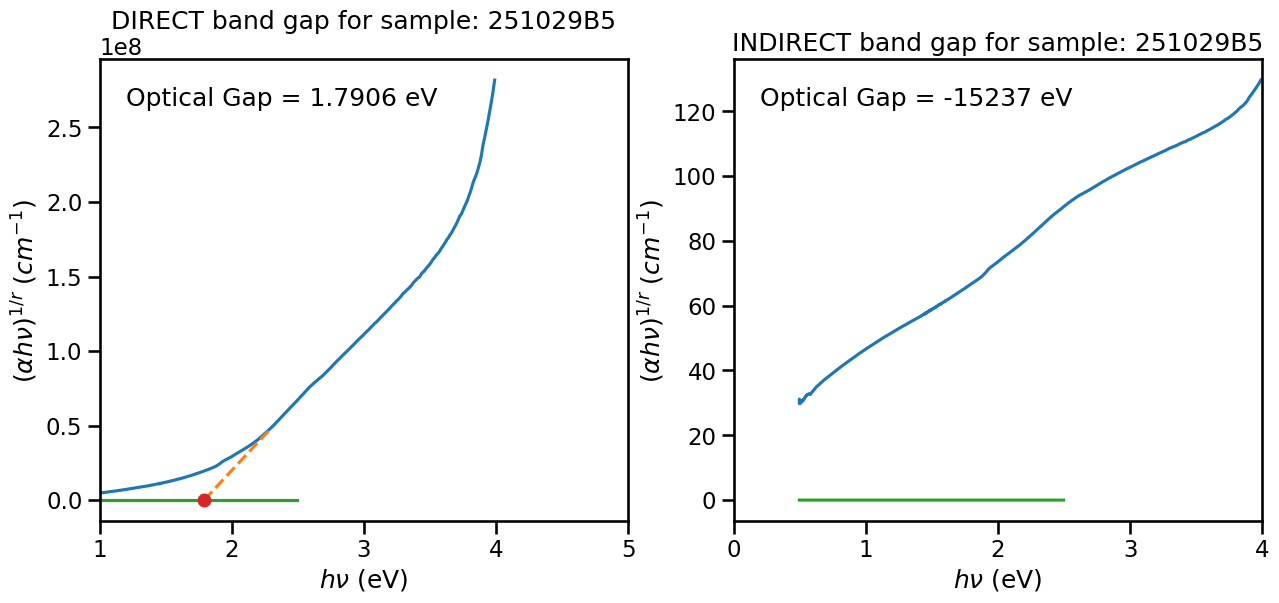

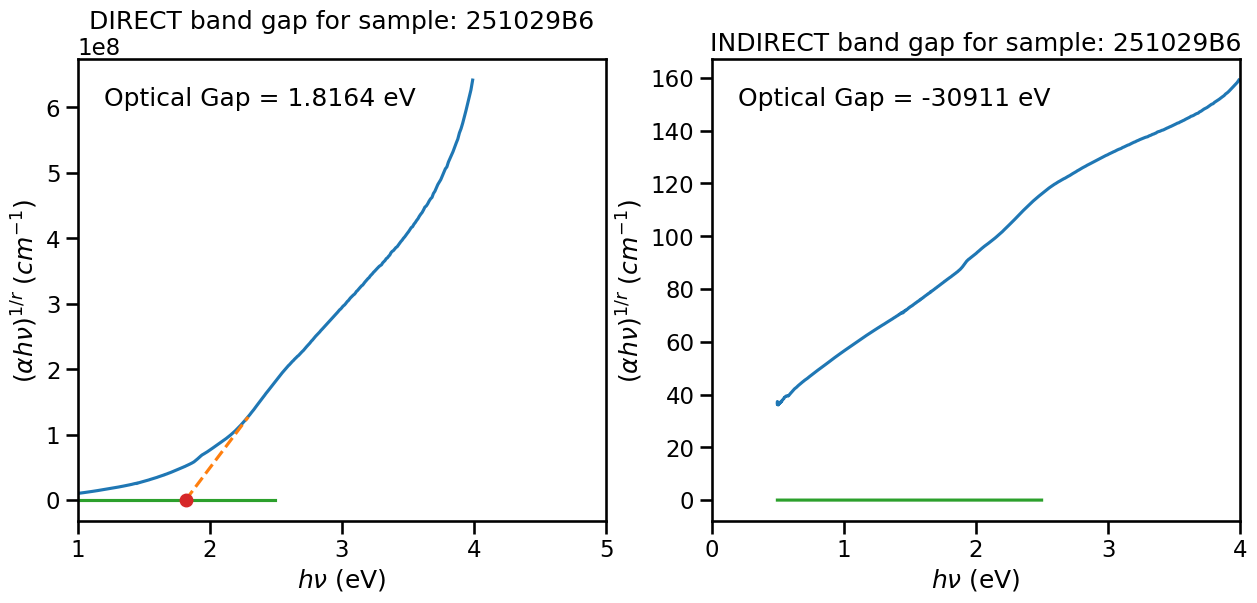

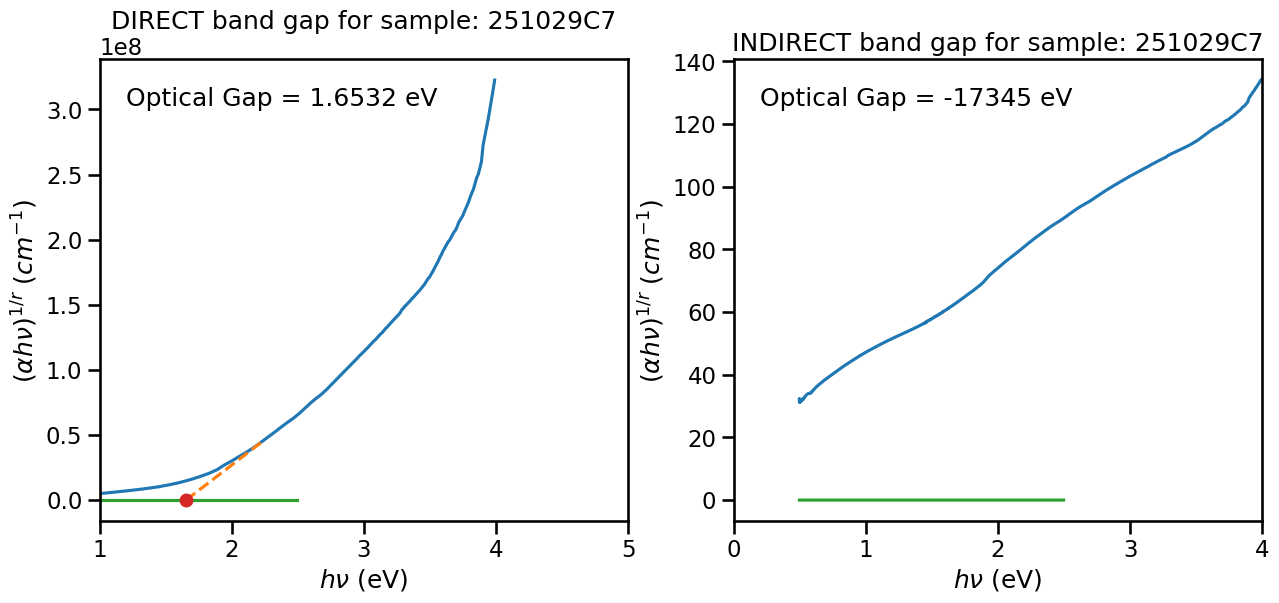

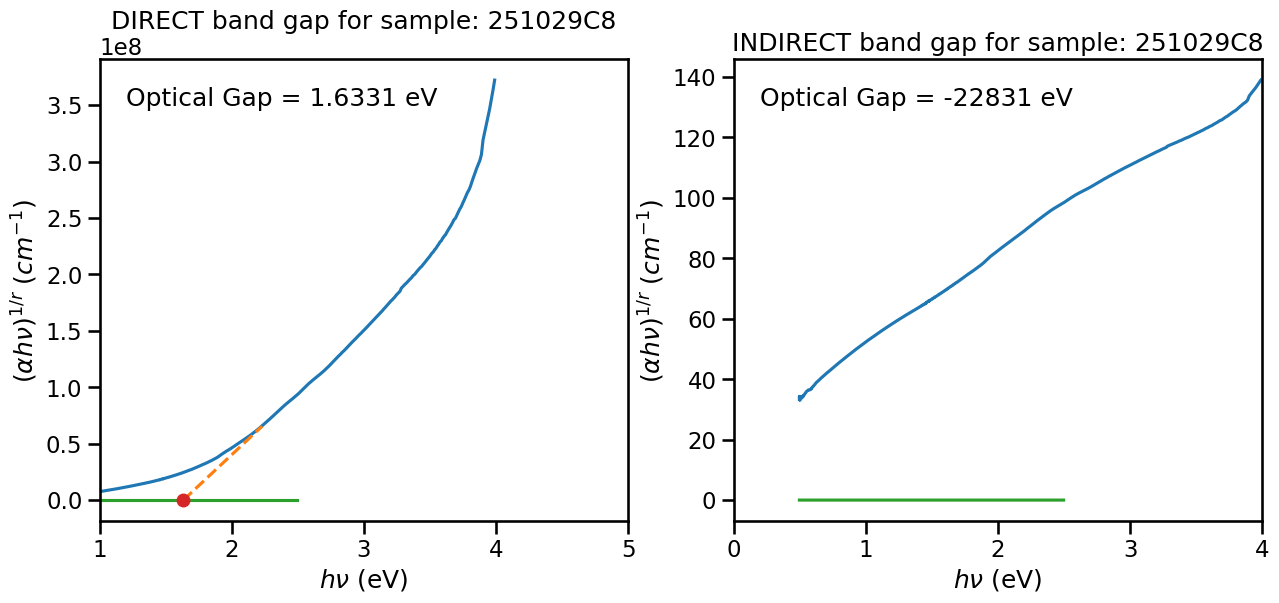

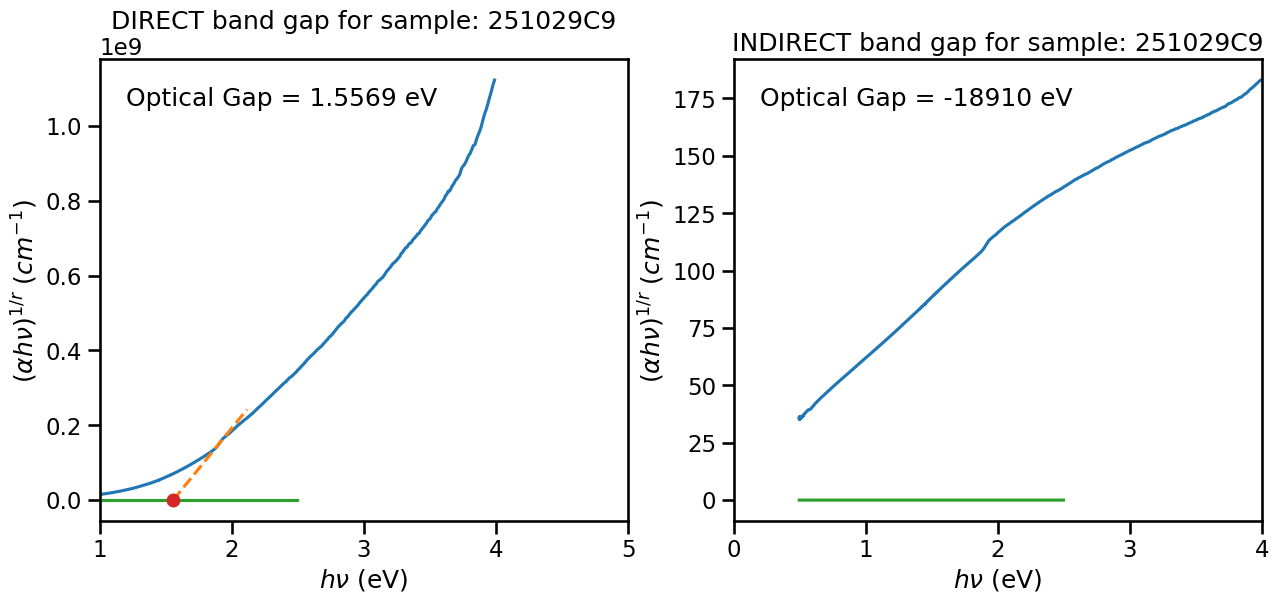

In [23]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

gaps = []
for k in res.keys():

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

        #If you think you are seeing the band gap of the substrate (glass or FTO)
        #with a bandgap around 3.5-4, you can modify this parameter here called max_value
        max_value = 2.5


        # Calculate Tauc plots
        tauc_spectrum = np.zeros((len(res[k]['hv'][res[k]['hv']<max_value]),3))
        x_tot = res[k]['hv'][res[k]['hv']<4]
        tauc_spectrum[:,0] = res[k]['hv'][res[k]['hv']<max_value]
        tauc_spectrum[:,1] = res[k]['DA'][res[k]['hv']<max_value]
        tauc_spectrum[:,2] = res[k]['IA'][res[k]['hv']<max_value]

        for y_data, ax, tit, y_tot in zip([tauc_spectrum[:,1], tauc_spectrum[:,2]],
                                          (ax1, ax2), ('DIRECT band gap for sample: ' + k, 'INDIRECT band gap for sample: ' + k ),
                                          [res[k]['DA'][res[k]['hv']<4], res[k]['IA'][res[k]['hv']<4]]):
          # Transform Tauc plot to interpolation function
          y = interp1d(tauc_spectrum[:,0], savgol_filter(y_data, 51, 3))
          x = np.linspace(tauc_spectrum[0,0], tauc_spectrum[-1,0], 5000)

          # Calculate 1st derivative along Tauc plot
          dy = np.diff(y(x), 1, 0)
          dx = np.diff(x, 1, 0)
          y_1d = interp1d(x[:-1], dy/dx)

          # Calculate 2nd derivative along Tauc plot
          d2y = np.diff(y(x), 2, 0)
          dx2 = 0.0001
          y_2d = interp1d(x[:-2], d2y/dx2)

          # Find point in Tauc plot where 2nd derivative == 0 and gradient is at a maximum
          gradmax = 0.

          for i in range(2, len(x[:-2])):
              grad = y_1d(x[:-2])[i]
              if grad > gradmax:
                  gradmax = grad
              if np.allclose([y_2d(x[:-2])[i]], [0.], atol=0.001) and y(x)[i] > 0.1*np.amax(y_data) and grad >= gradmax:# and x[:-2][i]<3.5:
                  x_0 = x[i]
                  y_0 = y(x)[i]

          # Calculate extrapolation line
          m = y_1d(x_0)
          c = y_0 - m*x_0

          # Calculate optical gap from extrapolation line
          x_cross = (0 - c)/m
          gap = x_cross

          #gaps.append([spectrum_file, x_cross])

          # Plot Tauc plot, extrapolation line and point equal to optical gap
          ax.set_xlabel(r'$ h \nu$ (eV)')
          ax.set_ylabel(r'$( \alpha h \nu )^{1/r}$ $(cm^{-1})$')
          ax.text(0.05, 0.9, 'Optical Gap = '+str(x_cross)[:6]+' eV', transform=ax.transAxes)
          ax.set_xlim(1,5)

          gaps.append([k,x_cross])

          ax.plot(x_tot, y_tot,'-',
                  [(0-c)/m, (0.7*np.amax(y_data)-c)/m], [0, 0.7*np.amax(y_data)], '--',
                  tauc_spectrum[:,0], np.zeros(len(tauc_spectrum)), '-',
                  x_cross, 0, 'o', )
          ax.plot()

          ax.set_title(tit)
          #print(m)
        plt.xlim([0,4])
        plt.savefig('Tauc plot for sample ' + k + '.png')
        plt.show()
        #plt.close()

4. Write down the values for the bandgap, you can also download the graphs and the data. The data for making the tauc plots will be save in files called "results_.xlsx" and the graphs will be saved in files called "Tauc plot for sample: __.png"

#  Sigmoid-Boltzmann function

Additionally, [Zanatta](https://www.nature.com/articles/s41598-019-47670-y#Equ9) recomends doing a Sigmoid-Boltzmann fitting based on the absorption coefficient previously calculated. This function is:

\begin{align}
  \alpha(E) = \alpha_{max} +\frac{\alpha_{min} - \alpha_{max}}{1 + \exp\left(\frac{E-E_0^{Boltz}}{\delta E}\right)}
\end{align}

where $\alpha_{min}$ ($\alpha_{max}$) stands for the minimum (maximum) absorption coefficient; $E_0^{Boltz}$ is the energy coordinate at which the absorption coefficient is halfway between $\alpha_{min}$ and $\alpha_{max}$; and $\delta E$ is associated with the slope of the sigmoid curve. In this case, 4 parameters will be optimized based on the absorption coefficient previously calculated ($\alpha_{comp}$) and the energy ($h\nu$) values .

Later the direct and indirect band gap will be calculated as follows:

\begin{align}
  E_g^{dir} = E_0^{Boltz} - 0.3 \delta E
\end{align}
\begin{align}
  E_g^{indir} = E_0^{Boltz} - 4.3 \delta E
\end{align}

with 0.3 and 4.3 as empirical constants determined by Zanatta from the corresponding direct and indirect results experimentally.


In [27]:
def boltzman_function(x, a_max, a_min, e_boltz, dE):
  return a_max + ( (a_min-a_max)/(1+np.exp((x-e_boltz)/(dE)))  )

def num_of_zeros(n):
  s = '{:.16f}'.format(n).split('.')
  if s[0] == '0':
    return len(s[1]) - len(s[1].lstrip('0')) + 1
  else:
    return 0

from scipy.optimize import curve_fit

def fit_boltzmann(xdata, ydata, sample, xlims=[0.5, 2.5], guess_band_gap = 1.7):

  ydata = ydata[xdata>xlims[0]]
  xdata = xdata[xdata>xlims[0]]

  ydata = ydata[xdata<xlims[1]]
  xdata = xdata[xdata<xlims[1]]

  xdata = xdata[ydata>0]
  ydata = ydata[ydata>0]

  try:
    popt, pcov = curve_fit(boltzman_function, xdata, ydata, p0=[np.max(ydata), np.min(ydata), guess_band_gap, 1], method='dogbox')
  except :
    print('Fitting not possible with dogbox method, trying with trf method...')
    try:
      popt, pcov = curve_fit(boltzman_function, xdata, ydata, p0=[np.max(ydata), np.min(ydata), guess_band_gap, 1], method='trf')
    except:
      print('Fitting not possible with trf method, trying with lm method...')
      try:
        popt, pcov = curve_fit(boltzman_function, xdata, ydata, p0=[np.max(ydata), np.min(ydata), guess_band_gap, 1], method='trf')
      except:
        print('No fitting possible')
        plt.figure()
        plt.scatter(xdata, ydata, label='data', color='k', s=10)
        plt.ylabel(r'$\\alpha(E)$')
        plt.xlabel('Energy (eV)')
        plt.title('Sigmoid-Boltzmann failed fitting for sample: ' + sample)
        return None, None


  perr = np.sqrt(np.diag(pcov))

  plt.figure(figsize=(10,8))
  plt.scatter(xdata, ydata, label='data', color='k', s=10)
  plt.plot(xdata, boltzman_function(xdata, *popt), 'r-',
          label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))

  plt.title('Sigmoid-Boltzmann fitting for sample: ' + sample)

  Eg_dir = (popt[2] - 0.3*popt[-1])
  Eg_ind = (popt[2] - 4.3*popt[-1])

  dEg = np.sqrt(perr[2]**2 + perr[-1]**2)

  decimals = num_of_zeros(dEg)

  plt.ylabel(r'$\alpha(E)$')
  plt.xlabel('Energy (eV)')

  plt.text(0.05, 0.7, r'Direct Optical Gap = '+str(round(Eg_dir, decimals)) + r'$\pm $' + str(round(dEg, decimals)) + ' eV' + '\n'
           r'Indirect Optical Gap = ' + str(round(Eg_ind, decimals)) + r'$\pm $' + str(round(dEg, decimals))+' eV',
           transform=plt.gca().transAxes)

  plt.legend()

  plt.savefig('SB fit for sample ' + sample + '.png')

  plt.show()

  return popt, perr

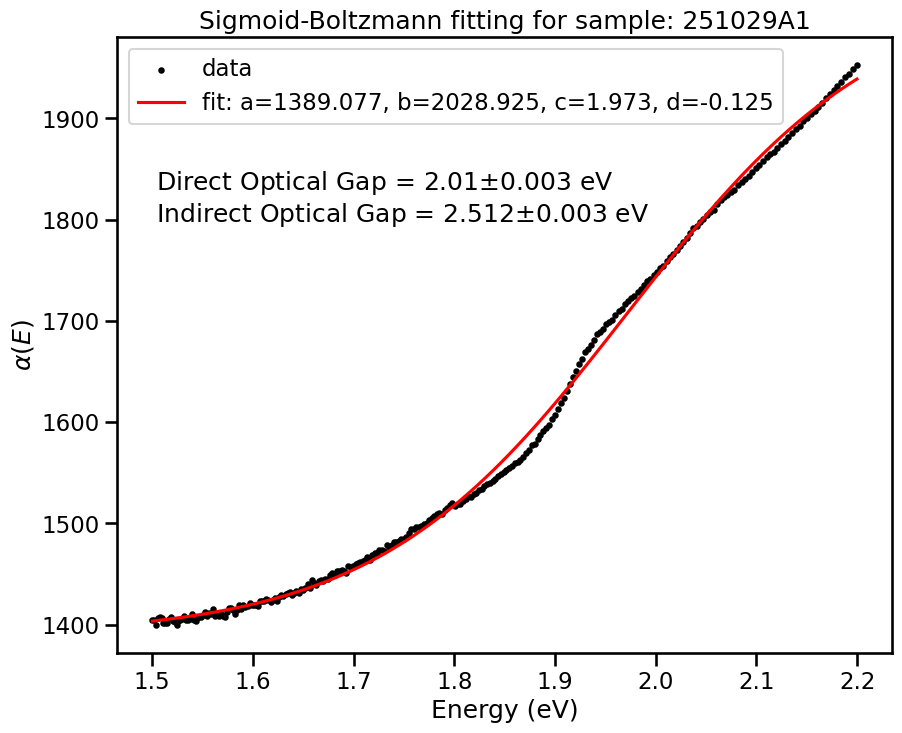

Sample: 251029A1
  Direct Optical Gap = 2.01 ± 0.003 eV
  Indirect Optical Gap = 2.512 ± 0.003 eV




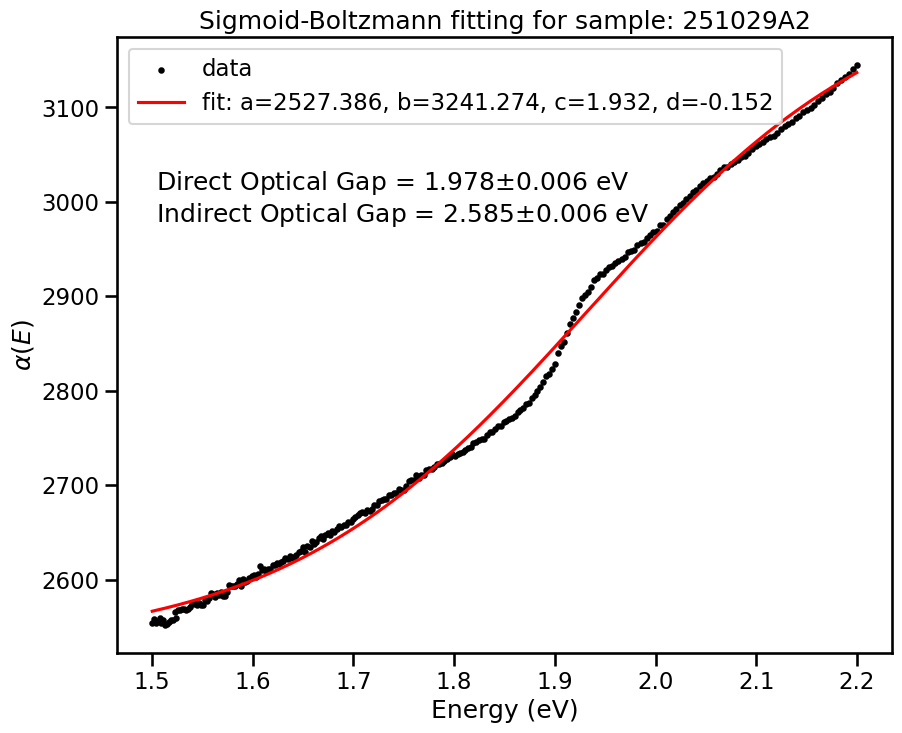

Sample: 251029A2
  Direct Optical Gap = 1.978 ± 0.006 eV
  Indirect Optical Gap = 2.585 ± 0.006 eV


Fitting not possible with dogbox method, trying with trf method...


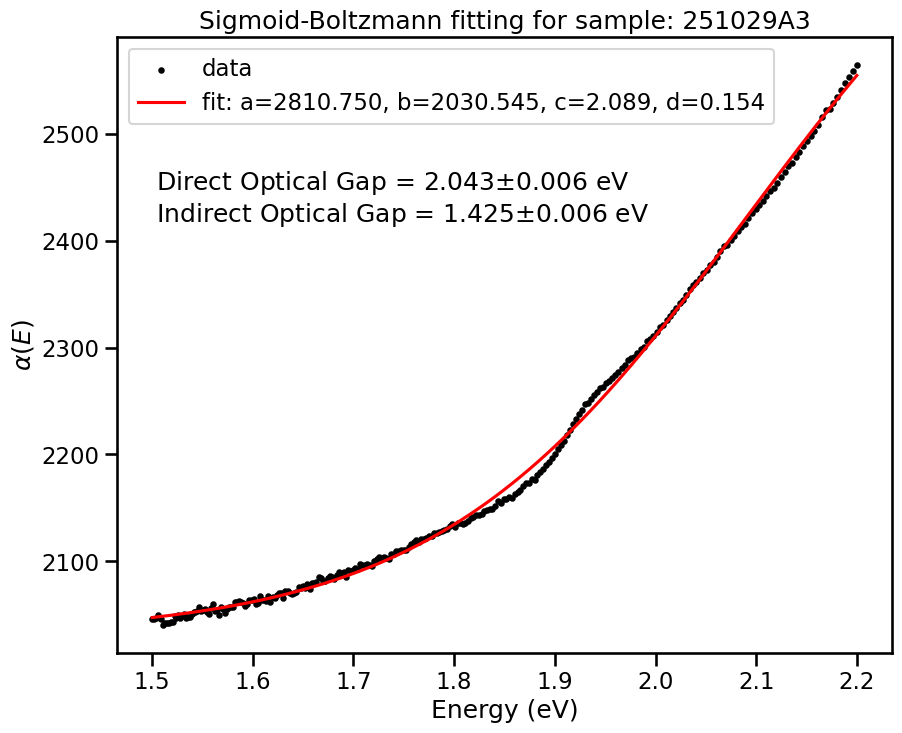

Sample: 251029A3
  Direct Optical Gap = 2.043 ± 0.006 eV
  Indirect Optical Gap = 1.425 ± 0.006 eV




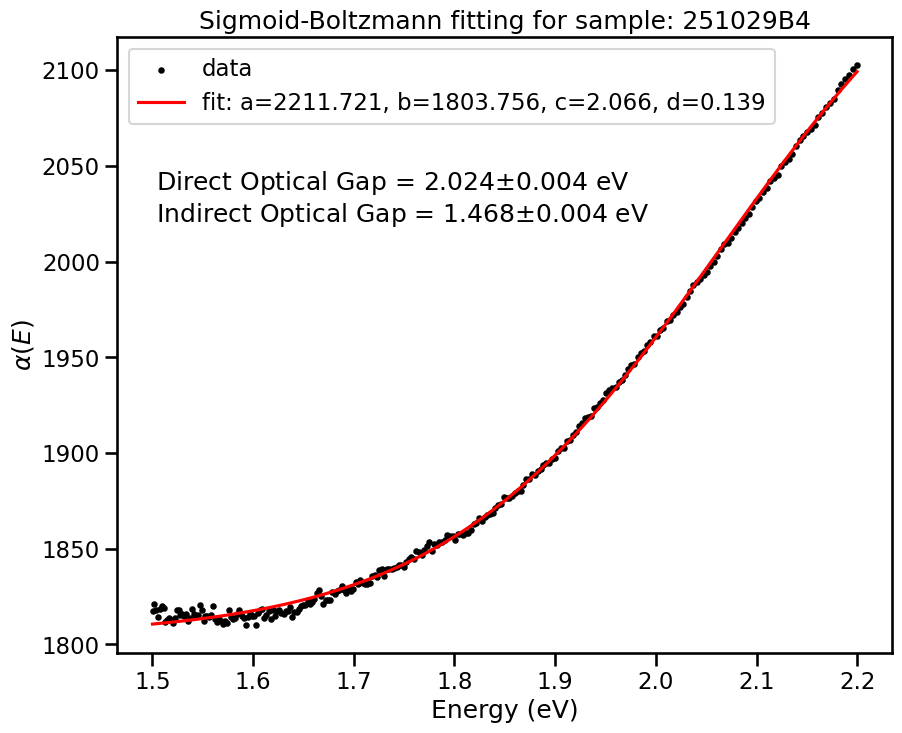

Sample: 251029B4
  Direct Optical Gap = 2.024 ± 0.004 eV
  Indirect Optical Gap = 1.468 ± 0.004 eV




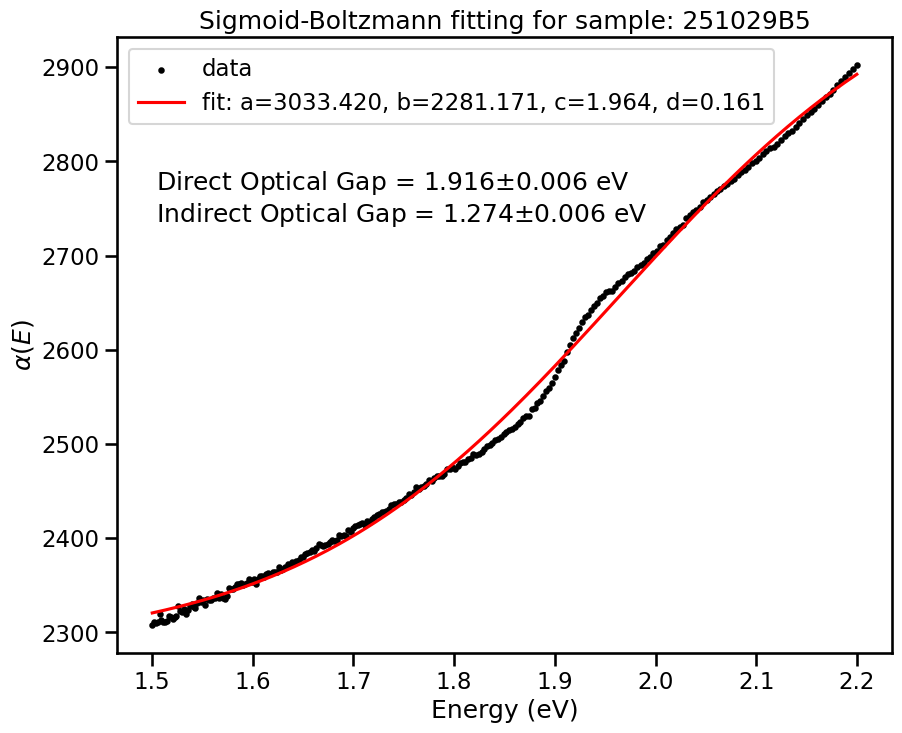

Sample: 251029B5
  Direct Optical Gap = 1.916 ± 0.006 eV
  Indirect Optical Gap = 1.274 ± 0.006 eV




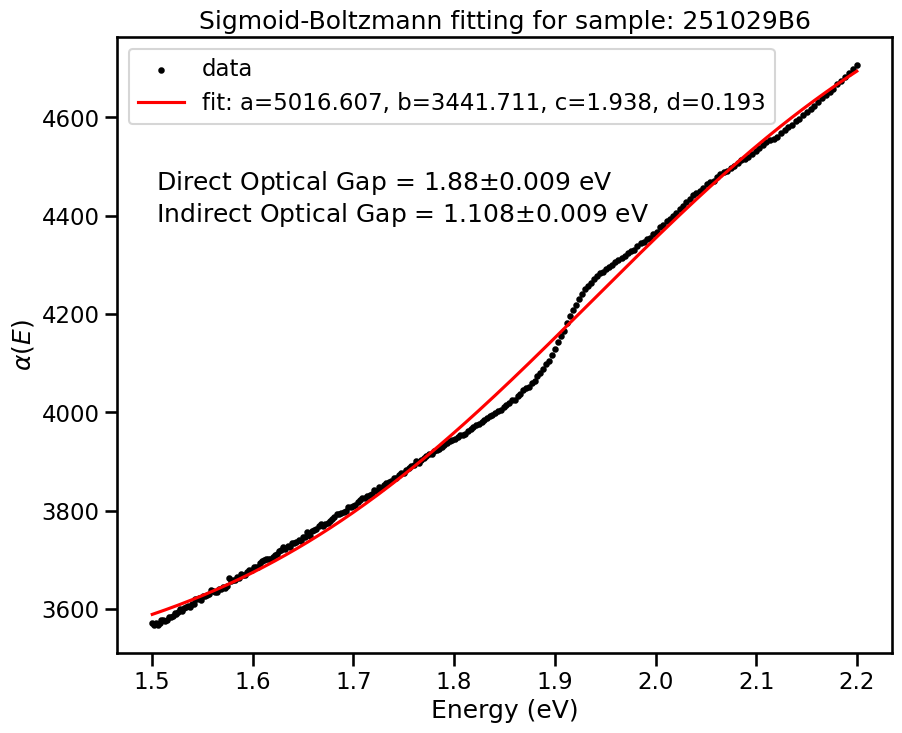

Sample: 251029B6
  Direct Optical Gap = 1.88 ± 0.009 eV
  Indirect Optical Gap = 1.108 ± 0.009 eV




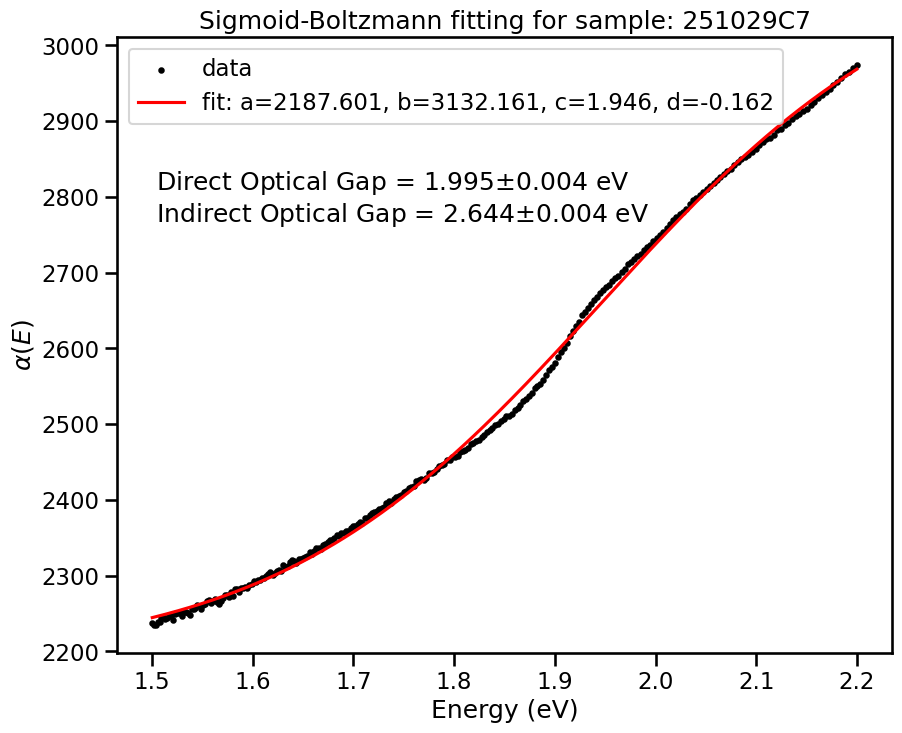

Sample: 251029C7
  Direct Optical Gap = 1.995 ± 0.004 eV
  Indirect Optical Gap = 2.644 ± 0.004 eV




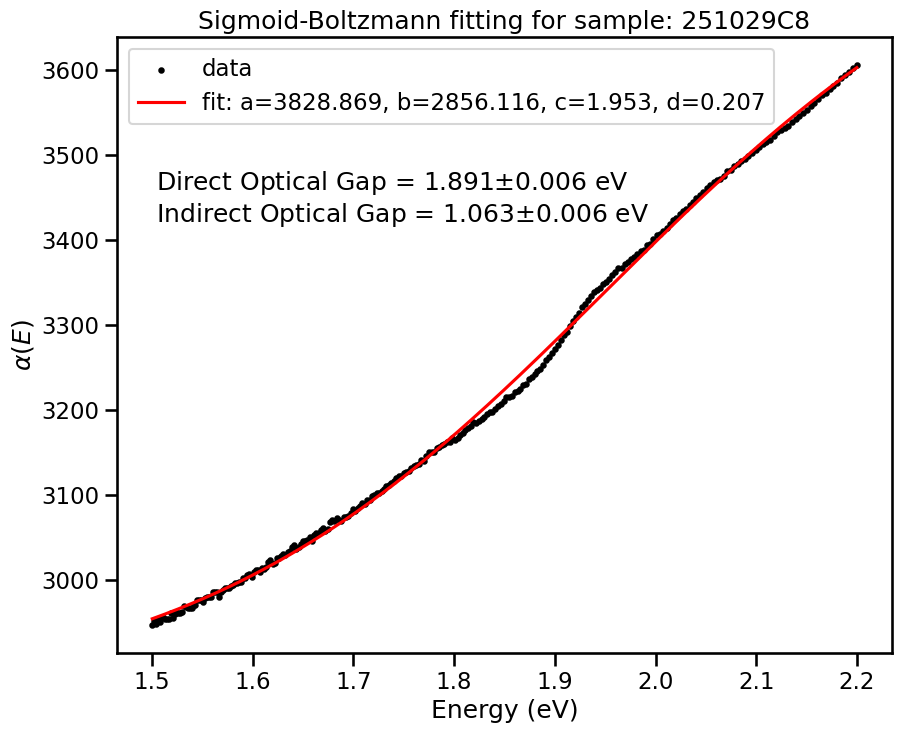

Sample: 251029C8
  Direct Optical Gap = 1.891 ± 0.006 eV
  Indirect Optical Gap = 1.063 ± 0.006 eV




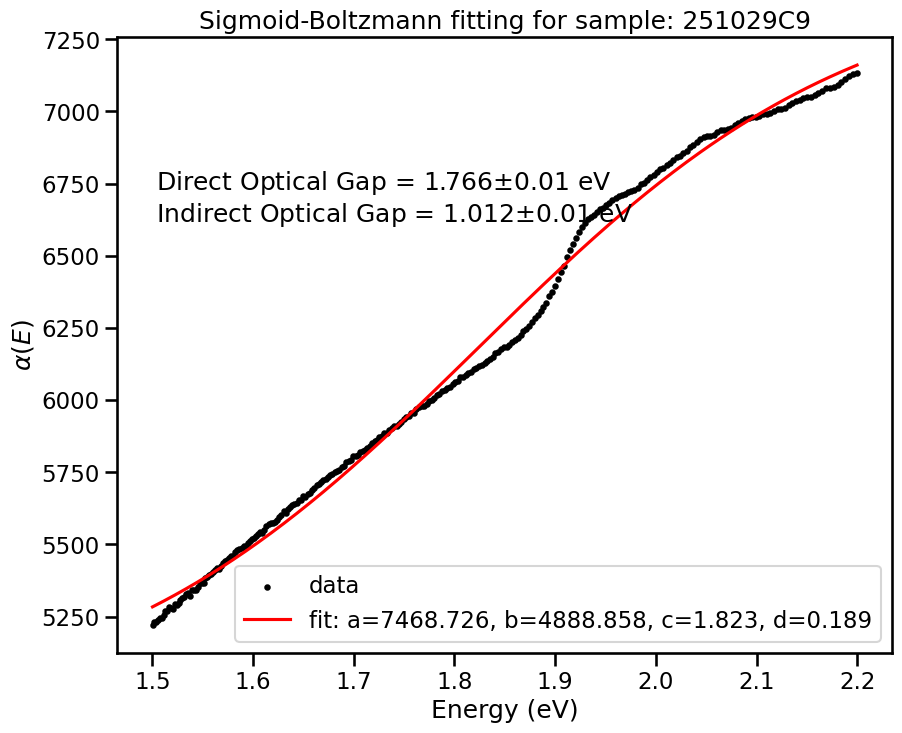

Sample: 251029C9
  Direct Optical Gap = 1.766 ± 0.01 eV
  Indirect Optical Gap = 1.012 ± 0.01 eV




In [31]:
for sam_label, sam_data in res.items():
    xdata = sam_data['hv']
    ydata = sam_data['alpha'] # Use the stored alpha values for fitting

    popt_vals, perr_vals = fit_boltzmann(xdata, ydata, sam_label, [1.5,2.2], 1.8)

    if popt_vals is not None and perr_vals is not None:
        Eg_dir = (popt_vals[2] - 0.3 * popt_vals[-1])
        Eg_ind = (popt_vals[2] - 4.3 * popt_vals[-1])
        dEg = np.sqrt(perr_vals[2]**2 + perr_vals[-1]**2)
        decimals = num_of_zeros(dEg)

        print(f"Sample: {sam_label}")
        print(f"  Direct Optical Gap = {round(Eg_dir, decimals)} \u00B1 {round(dEg, decimals)} eV")
        print(f"  Indirect Optical Gap = {round(Eg_ind, decimals)} \u00B1 {round(dEg, decimals)} eV")
        print("\n")